# RHAVIF BUDIMAN
# EDA PRACTICE CASE
## IYKRA DATA FELLOWSHIP BATCH 5

github link https://github.com/rhavifbudiman/IYKRA-DataFellowship-EDAPracticeCase

List of questions of this project:
1. Whether this data is clean?
2. How is the point distribution of the epl team? and which team is an anomaly?
3. Which team has the best attack?
4. Which team has the best defence?
5. Which team is good in the financial aspect?

### Answer

## Preparation

In [7]:
#import library
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from matplotlib import pyplot as plt

## Question 1 . Whether this data is clean?

In [8]:
# read in the data
data = pd.read_csv('https://raw.githubusercontent.com/Syukrondzeko/Fellowship-5/main/epl_1819.csv')

In [9]:
#check data
data.head(7)

,Team,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,...,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy
0,Manchester City,Champions League,1,26,150986355,38,32,2,4,95,...,58,63,362,518,0,543,295,4,64.0,89.0
1,Liverpool,Champions League,2,29,152425146,38,30,7,1,89,...,76,78,314,610,2,639,317,1,58.8,84.4
2,Chelsea,Champions League Qualification,3,25,146030216,38,21,9,8,63,...,85,73,351,618,2,593,330,2,59.9,87.6
3,Tottenham,Champions League Qualification,4,26,145230801,38,23,2,13,67,...,121,112,326,626,3,770,411,5,56.7,83.2
4,Arsenal,Europa League,5,25,142193180,38,21,7,10,73,...,133,118,412,609,2,762,404,7,56.1,83.3
5,Manchester United,Europa League,6,27,142512868,38,19,9,10,65,...,122,128,355,581,2,785,370,6,53.3,82.3
6,Wolverhampton,Europa League Qualification,7,15,127165114,38,16,9,13,47,...,100,148,501,720,2,824,464,4,47.4,78.2


In [10]:
# check the size
data.shape

(20, 44)

In [11]:
data.duplicated(subset='Team').sum()

0

this data have 0 duplicated data

In [12]:
# check the type for all columns in data that we have
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Team                           20 non-null     object 
 1   category                       20 non-null     object 
 2   general_league_position        20 non-null     int64  
 3   finance _live_games_televised  20 non-null     int64  
 4   finance _tv_revenue            20 non-null     int64  
 5   general_matches_played         20 non-null     int64  
 6   general_won                    20 non-null     int64  
 7   general_draw                   20 non-null     int64  
 8   general_lost                   20 non-null     int64  
 9   attack_scored                  20 non-null     int64  
 10  defence_goals_conceeded        20 non-null     int64  
 11  general_goal_difference        20 non-null     int64  
 12  general_points                 20 non-null     int64

you can read that we have so much info ahahaha, but you must careful because some of them are integer but declared in this info is object is like string that can contain numeric and alphabetic value, we must see that variable! the most easiest thing used excel like me ahahaha, you can compare between int64 type and object type

In [13]:
data['attack_passes'].head(5)

0    26,581
1    23,638
2    25,070
3    21,295
4    20,805
Name: attack_passes, dtype: object

In [14]:
data['attack_posession'].head(5)

0    64.0
1    58.8
2    59.9
3    56.7
4    56.1
Name: attack_posession, dtype: float64

so we can see the difference, the difference because the separator for thousand, if you crosschek it using excel, all of thousand information using comma (,) not dot(.) so we must change it back to dot (.) , the easiest way to change it we back to read_csv function with a restriction, all thousand using comma convert to dot

In [15]:
# read in the data
data = pd.read_csv('epl_1819.csv', thousands = ",")

In [16]:
data['attack_passes'].head(5)

0    26581
1    23638
2    25070
3    21295
4    20805
Name: attack_passes, dtype: int64

In [17]:
# check the type for all columns in data that we have
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Team                           20 non-null     object 
 1   category                       20 non-null     object 
 2   general_league_position        20 non-null     int64  
 3   finance _live_games_televised  20 non-null     int64  
 4   finance _tv_revenue            20 non-null     int64  
 5   general_matches_played         20 non-null     int64  
 6   general_won                    20 non-null     int64  
 7   general_draw                   20 non-null     int64  
 8   general_lost                   20 non-null     int64  
 9   attack_scored                  20 non-null     int64  
 10  defence_goals_conceeded        20 non-null     int64  
 11  general_goal_difference        20 non-null     int64  
 12  general_points                 20 non-null     int64

its already alright, its a little bit not clean but its already great data!

## Question 2 . How is the point distribution of the EPL team? Which team is an anomaly? 

In [18]:
colname = list(data.columns.values)
list(enumerate(colname))

[(0, 'Team'),
 (1, 'category'),
 (2, 'general_league_position'),
 (3, 'finance _live_games_televised'),
 (4, 'finance _tv_revenue'),
 (5, 'general_matches_played'),
 (6, 'general_won'),
 (7, 'general_draw'),
 (8, 'general_lost'),
 (9, 'attack_scored'),
 (10, 'defence_goals_conceeded'),
 (11, 'general_goal_difference'),
 (12, 'general_points'),
 (13, 'general_squad_size'),
 (14, 'general_squad_average_age'),
 (15, 'general_squad_foreigners'),
 (16, 'finance _team_market'),
 (17, 'finance _market_average'),
 (18, 'attack_passes'),
 (19, 'attack_passes_through'),
 (20, 'attack_passes_long'),
 (21, 'attack_passes_back'),
 (22, 'attack_crosses'),
 (23, 'attack_corners_taken'),
 (24, 'attack_shots'),
 (25, 'attack_shots_on_target'),
 (26, 'attack_goals_headed'),
 (27, 'attack_goals_penalty'),
 (28, 'attack_goals_box'),
 (29, 'attack_goals_outsidebox'),
 (30, 'general_card_yellow'),
 (31, 'general_card_red'),
 (32, 'attack_goals_counter'),
 (33, 'attack_goals_freekick'),
 (34, 'defence_saves'

In [19]:
colnamen = colname.remove('Team')
colnamen = colname.remove('category')


C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

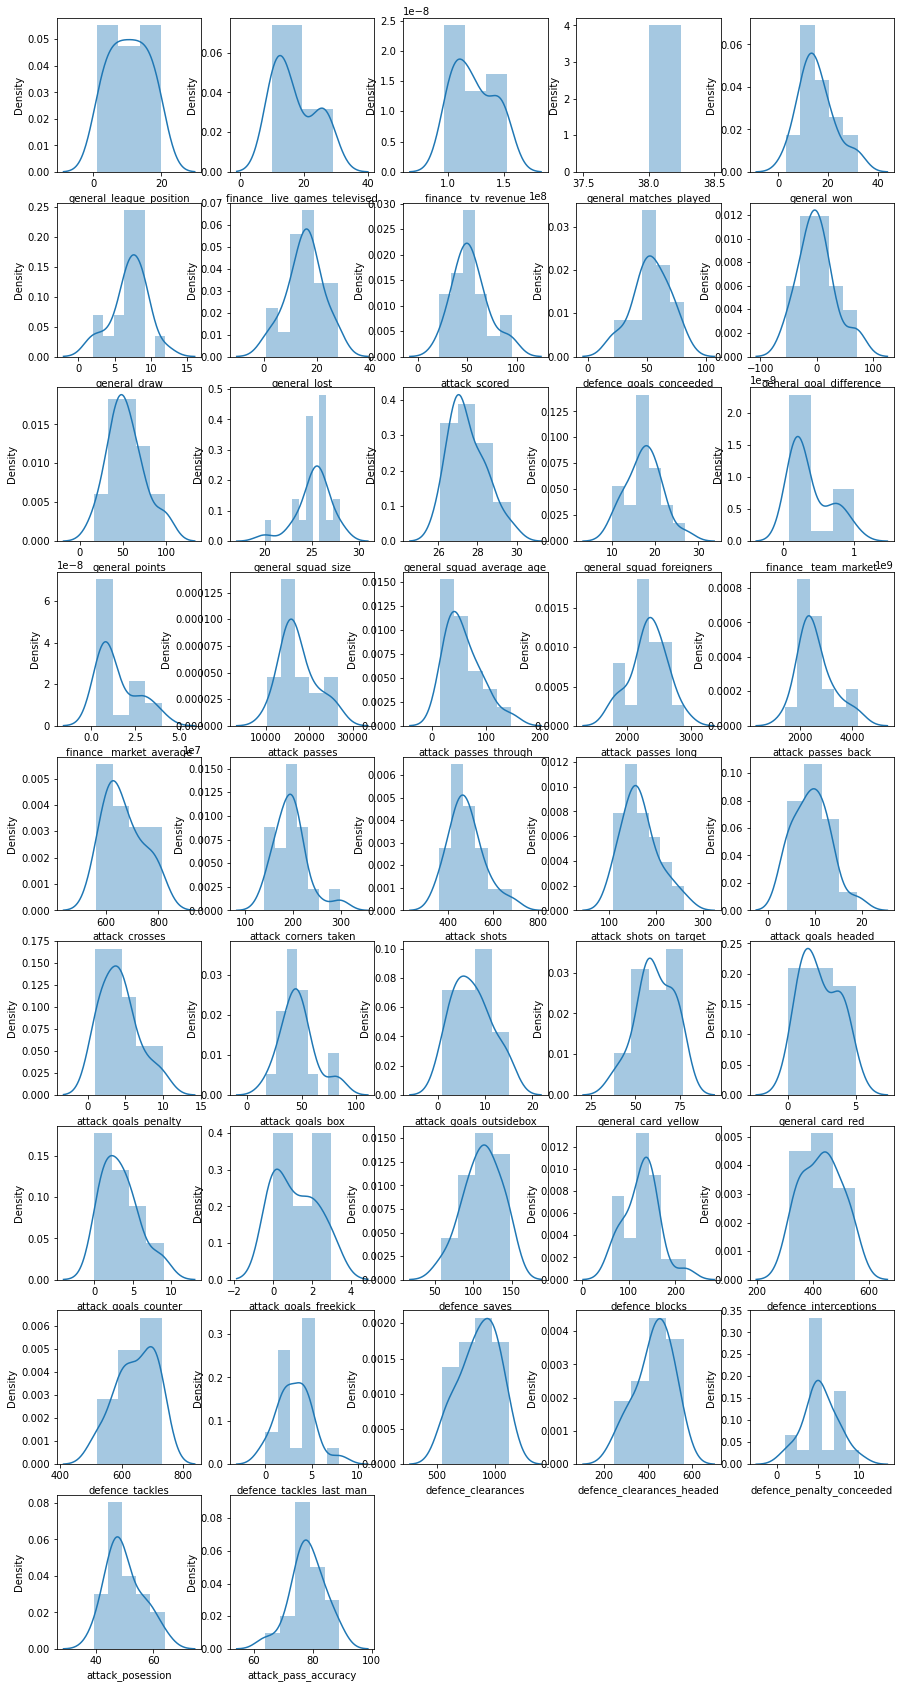

In [20]:
plt.figure(figsize = (15,30))
for i in enumerate(colname):
    plt.subplot(9,5,i[0]+1)
    sns.distplot(data[i[1]])

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

if the normal distribution the model position in middle, so only a few variable normal in this case, to see details, you can see graph before this line, so we pick one of the anomaly distribution. I pick 'general_squad_size'column, in distribution graph we can see is has a little bit model in left side, so we must check it again using boxplot to see the outlier of this column

{'whiskers': [<matplotlib.lines.Line2D at 0x135c5c6aa00>,
 'caps': [<matplotlib.lines.Line2D at 0x135c5c73100>,
 'boxes': [<matplotlib.lines.Line2D at 0x135c5c6a6a0>],
 'medians': [<matplotlib.lines.Line2D at 0x135c5c737c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x135c5c73b20>],
 'means': []}

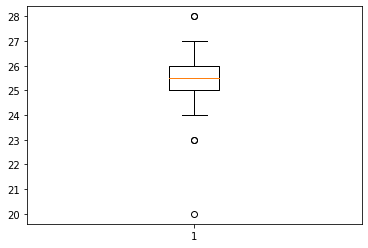

In [21]:
plt.boxplot(data['general_squad_size'])

we can see general_squad_size has outlier, so treatment to this case is remove the outlier or replace the value of the outlier

## Question 3 . Which team has the best attack? 

after seeing the data, i conclude to make model from team with best attack is

best attack = attack_scored + attack_passes + attack_passes_through + attack_passes_long + attack_passes_back + attack_crosses + attack_corners_taken + (attack_shots_on_target / attack_shots) + attack_posession + attack_pass_accuracy

but all of that value must be standarized first

In [22]:
#make list attack variable
listat = ['attack_scored','attack_passes', 'attack_passes_through', 'attack_passes_long','attack_passes_back','attack_crosses',
        'attack_shots','attack_posession','attack_pass_accuracy','attack_corners_taken','attack_shots_on_target']
#standarize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# copy the team names and scale the variables
data_atk = data[['Team']].copy()
data_atk[listat] = scaler.fit_transform(data[listat])

d = data_atk

d['best_attack'] = d['attack_scored'] + d['attack_passes'] + d['attack_passes_through'] + d['attack_passes_long'] + d['attack_passes_back'] + d['attack_crosses'] + d['attack_corners_taken'] + (d['attack_shots_on_target'] / d['attack_shots']) + d['attack_posession'] + d['attack_pass_accuracy']
d.head(5).sort_values(by='best_attack', ascending=False)


,Team,attack_scored,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_shots,attack_posession,attack_pass_accuracy,attack_corners_taken,attack_shots_on_target,best_attack
0,Manchester City,1.000000,1.000000,0.740458,0.035587,1.000000,0.876984,1.000000,1.000000,1.000000,1.000000,1.000000,8.653029
1,Liverpool,0.917808,0.820055,0.633588,0.423488,0.708009,0.630952,0.665635,0.791165,0.816733,0.689873,0.776316,7.597950
2,Chelsea,0.561644,0.907612,1.000000,0.000000,0.870305,0.515873,0.764706,0.835341,0.944223,0.474684,0.592105,6.883973
3,Tottenham,0.616438,0.676796,0.549618,0.438612,0.628278,0.321429,0.547988,0.706827,0.768924,0.341772,0.532895,6.021153
4,Arsenal,0.698630,0.646836,0.381679,0.256228,0.596740,0.170635,0.331269,0.682731,0.772908,0.436709,0.407895,5.874404


so the best attack team is manchester city with 8.65 attack points

## Question 4 . Which team has the best defence? 

after seeing the data, i conclude to make model from team with best defence is

best defence= defence_goals_conceeded+ defence_saves+ defence_blocks+ defence_interceptions+defence_tackles+defence_tackles_last_man+defence_clearances+defence_clearances_headed+defence_penalty_conceeded

but all of that value must be standarized first

In [24]:
#make list defence
listdf = ['defence_goals_conceeded','defence_saves', 'defence_blocks',
          'defence_interceptions','defence_tackles','defence_tackles_last_man',
          'defence_clearances','defence_clearances_headed','defence_penalty_conceeded']

data_df = data[['Team']].copy()
data_df[listdf] = scaler.fit_transform(data[listdf])

s = data_df

s['best_defence'] = s['defence_goals_conceeded']+s['defence_saves']+ s['defence_blocks'] + s['defence_interceptions'] + s['defence_tackles']+s['defence_tackles_last_man']+s['defence_clearances']+s['defence_clearances_headed']+s['defence_penalty_conceeded']
s.head(5).sort_values(by='best_defence', ascending=False)

,Team,defence_goals_conceeded,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,best_defence
4,Arsenal,0.491525,0.833333,0.345912,0.418803,0.429245,0.250,0.379549,0.496855,0.666667,4.311891
3,Tottenham,0.288136,0.700000,0.308176,0.051282,0.509434,0.375,0.393414,0.518868,0.444444,3.588754
2,Chelsea,0.288136,0.300000,0.062893,0.158120,0.471698,0.250,0.086655,0.264151,0.111111,1.992764
1,Liverpool,0.000000,0.200000,0.094340,0.000000,0.433962,0.250,0.166378,0.223270,0.000000,1.367950
0,Manchester City,0.016949,0.000000,0.000000,0.205128,0.000000,0.000,0.000000,0.154088,0.333333,0.709499


so the best defence team is arsenal with 4.311 defence points

## Question 5 . Which team has the best finance? 

after seeing the data, i conclude to make model from team with best financial aspect rating is
best_finance = finance _live_games_televised + finance _tv_revenue+finance _tv_revenue+finance _team_market 

In [25]:
#make list finance
listfn = ['finance _live_games_televised','finance _tv_revenue', 'finance _team_market',
          'finance _market_average']
data_fn = data[['Team']].copy()
data_fn[listfn] = scaler.fit_transform(data[listfn])

f = data_fn

f['best_finance_rating'] = f['finance _live_games_televised']+f['finance _tv_revenue']+ f['finance _tv_revenue'] + f['finance _team_market'] 
f.head(5).sort_values(by='best_finance_rating', ascending=False)

,Team,finance _live_games_televised,finance _tv_revenue,finance _team_market,finance _market_average,best_finance_rating
1,Liverpool,1.000000,1.000000,0.818286,0.860853,3.818286
0,Manchester City,0.842105,0.974213,1.000000,1.000000,3.790532
2,Chelsea,0.789474,0.885388,0.756197,0.729092,3.316446
3,Tottenham,0.842105,0.871060,0.708012,0.713605,3.292238
4,Arsenal,0.789474,0.816619,0.671573,0.648082,3.094285


so after counting the rating, the best team with good financial aspect is liverpool